In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import plot

In [2]:
data = {
    k: np.load(plot.get_test(k))["batch_loss"][1, :500]
    for k in [
        "adam", "choice_20", "choice_50", "choice_100",
        "choice_hard", "choice_hard_50", "choice_mlp"
    ]
}

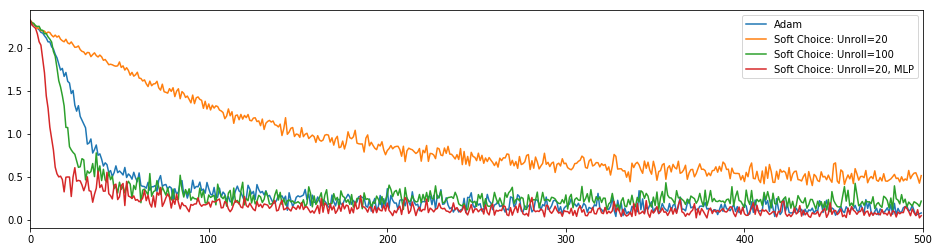

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(16, 4))
for k in ["adam", "choice_20", "choice_100", "choice_mlp"]:
    axs.plot(data[k], label=plot.get_name(k))

axs.set_xlim(0, 500)
axs.legend()

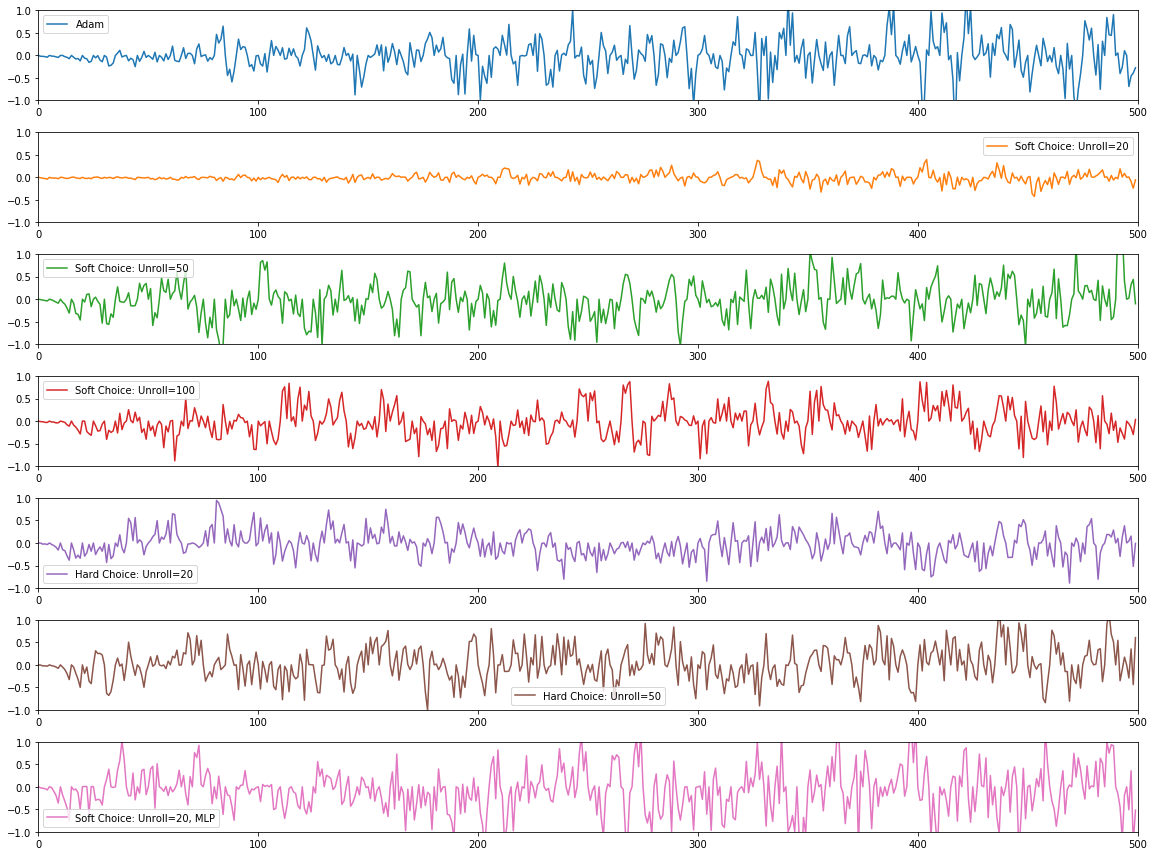

In [10]:
def stagger(x):
    x = x[:500].reshape(100, -1)
    x = np.stack([y - y[0] for y in x])
    return x.reshape(-1)

fig, axs = plt.subplots(7, 1, figsize=(16, 12))
for k, ax, c in zip(data, axs, ["C0", "C1", "C2", "C3", "C4", "C5", "C6"]):
    ax.plot(stagger(np.log(data[k])), label=plot.get_name(k), color=c)
    ax.set_xlim(0, 500)
    ax.set_ylim(-1, 1)
    ax.legend()
fig.tight_layout()

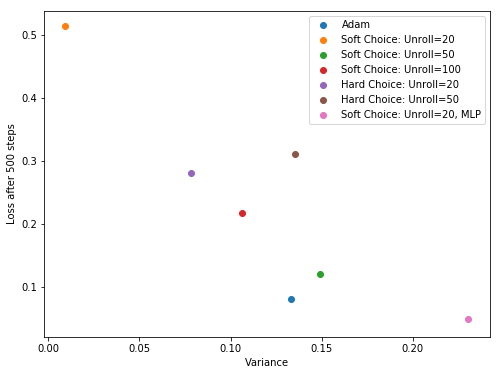

In [9]:
import numpy as np
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
for k in data:
    axs.scatter(np.var(stagger(np.log(data[k]))), data[k][-1], label=plot.get_name(k))
    axs.legend()
    axs.set_xlabel("Variance")
    axs.set_ylabel("Loss after 500 steps")